### Importing the necessary libraries

In [5]:
import pandas as pd

### Reading data from excel
- when working in the same directory

In [6]:
student_data = pd.read_excel("Computing_Student_Performance1.xlsx")

# student_data = pd.read_csv("Computing_Student_Performance1.csv")

student_data.head(6)

,Name,Access_no,Gender,Age,Course,DSC3108,DSC3114,MTH3108,SYE3104
0,Nansubuga Diana,B20811,Female,21.0,BSDS,72.0,51.0,72.0,59.0
1,Namaganda Anitah,B20812,Female,18.0,BSDS,97.0,90.0,81.0,67.0
2,Calvin Diego,B20813,Male,19.0,BSCS,51.0,76.0,80.0,69.0
3,Arinaitwe Lorraine,B20814,Female,23.0,BSIT,80.0,77.0,96.0,51.0
4,Ssendi Malon,B20815,Male,23.0,BSCS,68.0,59.0,51.0,52.0
5,Kisa Emmanuel,B20816,Male,19.0,BSIT,77.0,84.0,56.0,78.0


- when working in a different directory

In [7]:
covid_data1 = pd.read_csv("Computing_Student_Performance1.xlsx")


covid_data.head(6)

UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8f in position 22: invalid start byte

In [ ]:
student_data.head(6)

In [ ]:
student_data.tail(6)

In [ ]:
student_data.shape

In [ ]:
student_data.columns

In [ ]:
student_data.iloc[[1,7]]

In [ ]:
student_data.loc[[1,7]]

### EXploratory Data Analysis

In [ ]:
### checking for missing values
missing_values = student_data.isna().any() ## boolean for columns with missing values and those without
missing_values

In [ ]:
missing_values1 = student_data.isna().sum()
missing_values1

In [ ]:
student_data.info()

In [ ]:
## checkin for categorical values
categorical_values = student_data.select_dtypes(include='object')
categorical_values.head()

In [ ]:
continuous_values = student_data.select_dtypes(exclude= "object")
continuous_values.head()

## Dealing with missing values
- Dropping the missing values
- imputation of the missing values
- filling the missing values
- interpolation of the missing values

In [ ]:
missing_values1

In [ ]:
## creating a new dataframe that i will use to drop the missing values
drop_df = student_data
drop_df.head(5)

In [ ]:
drop_df.dropna(axis=0 , inplace=True) ## deleting the row with the missing values

## checking for missing values
drop_df.isna().sum()


In [125]:
col_drop = student_data

In [ ]:
missing_values1

In [ ]:
col_drop.dropna(axis=1, inplace=True) ## deleting the columns with the missing values
col_drop.isna().sum()

### Assignment 

In [ ]:
missing_values1

In [129]:
### interpolation 
student_data['DSC3108'] = student_data['DSC3108'].interpolate(method='linear')


In [ ]:
student_data.isna().sum()

In [ ]:
missing_values1

### Definition:
An outlier is a data point that stands out distinctly from the rest of the data in a dataset, potentially indicating errors in data collection, unusual events, or a unique subpopulation within the data. 
### Importance in data mining:
- Accuracy of analysis: Outliers can skew the results of statistical analysis and predictive modeling, leading to misleading conclusions if not identified and addressed appropriately. 
- Data quality check: Identifying outliers helps in detecting potential errors or inconsistencies in the data collection process. 
Insight generation: Sometimes, outliers can reveal valuable insights about rare events or hidden patterns within the data. 

## Types of outliers
### Global Outliers (Point Anomalies)
 - These are single data points that significantly deviate from the rest of the dataset.
 -Example: A house priced at $10 million in a neighbourhood where most houses are
priced around $300,000.
### Contextual Outliers (Conditional Anomalies)
- These depend on the context of the data.
- Example: A temperature of 30°C is normal in summer but would be an outlier in
winter.
### Collective Outliers
- A group of data points that deviate together from the rest of the dataset.
-  Example: A sudden drop in website traffic over a specific time period due to a
technical issue.

## Methods for detecting outliers
1. Visual Methods
### Boxplot
- A boxplot displays the interquartile range (IQR), and data points outside 1.5 times the
IQR are considered potential outliers.
o Example: Points above the upper whisker or below the lower whisker in the
plot.
### Scatterplot
-  Useful for bivariate data. Outliers often appear as points that do not follow the
general trend.
### Histogram
- A histogram can reveal unusually high or low-frequency bins that indicate outliers.

2. Statistical Methods
### Z-Score (Standard Score)
-  Measures how far a data point is from the mean in terms of standard deviations.
- Formula: z=x−μσz = \frac{{x - \mu}}{{\sigma}}z=σx−μ​
- A common threshold is ∣z∣&gt;3|z| &gt; 3∣z∣&gt;3.

## IQR Method
- Outliers are values beyond:

## Checking for the outiers and data visualization

#### Checking for data distribution


In [14]:
### continous data
continuous = student_data.select_dtypes(exclude="object")

In [12]:
import matplotlib.pyplot as plt

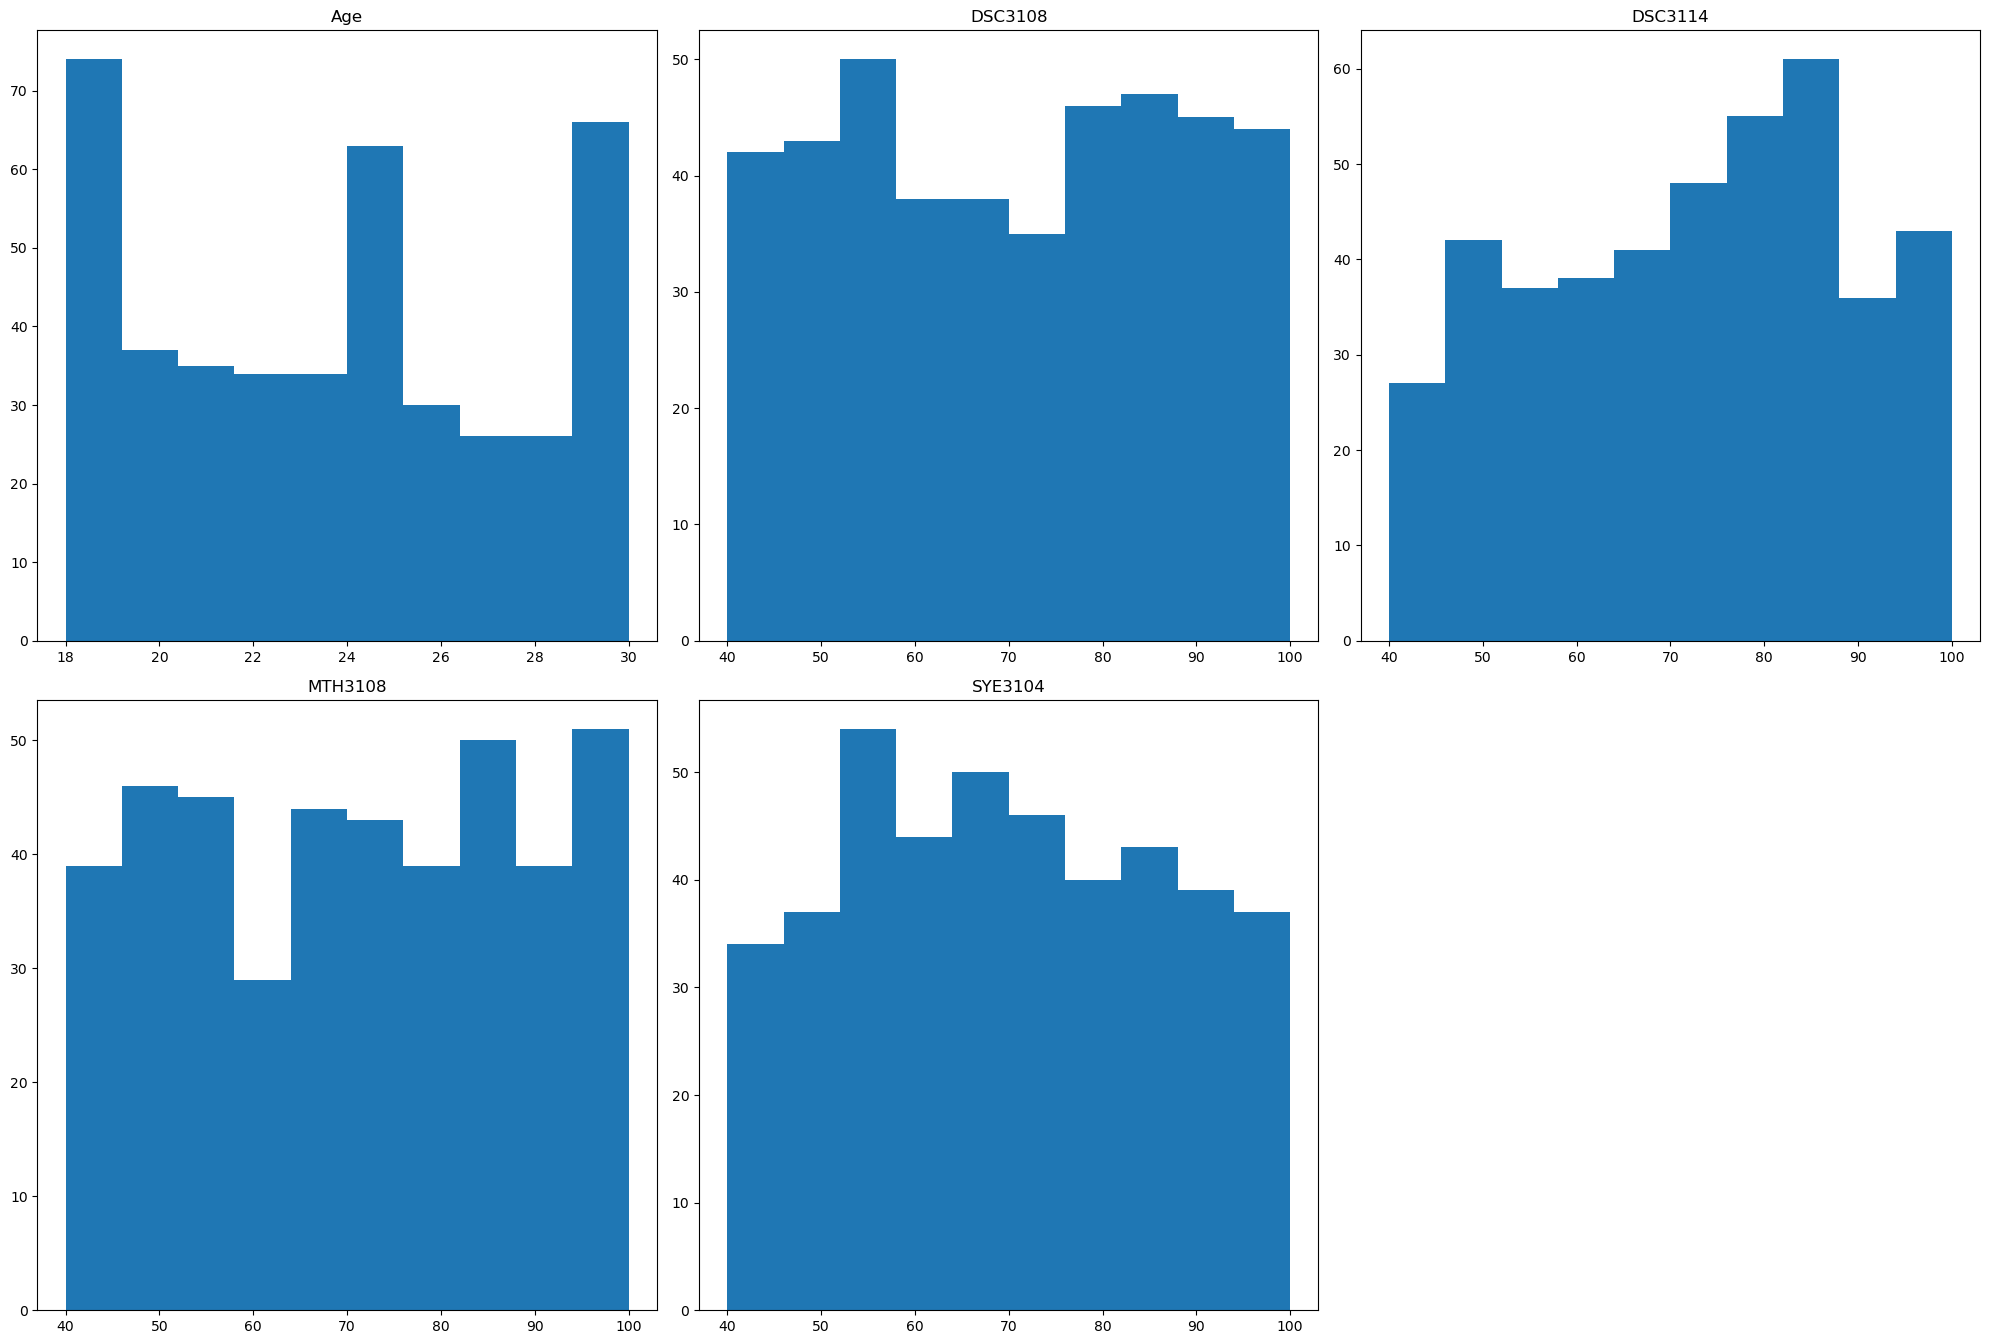

In [15]:

###checking for outliers using boxplot 
plt.figure(figsize=(20,20))
for i,col in enumerate(continuous.columns):
    plt.subplot(3,3, i+1)
    plt.hist(student_data[col])
    plt.title(col)
plt.tight_layout()
plt.show()

In [17]:
def box_plotting(continuous):
    plt.figure(figsize=(20,20))
    for i,col in enumerate(continuous.columns):
        plt.subplot(3,3, i+1)
        plt.boxplot(student_data[col])
        plt.title(col)
    plt.tight_layout()
    plt.show()

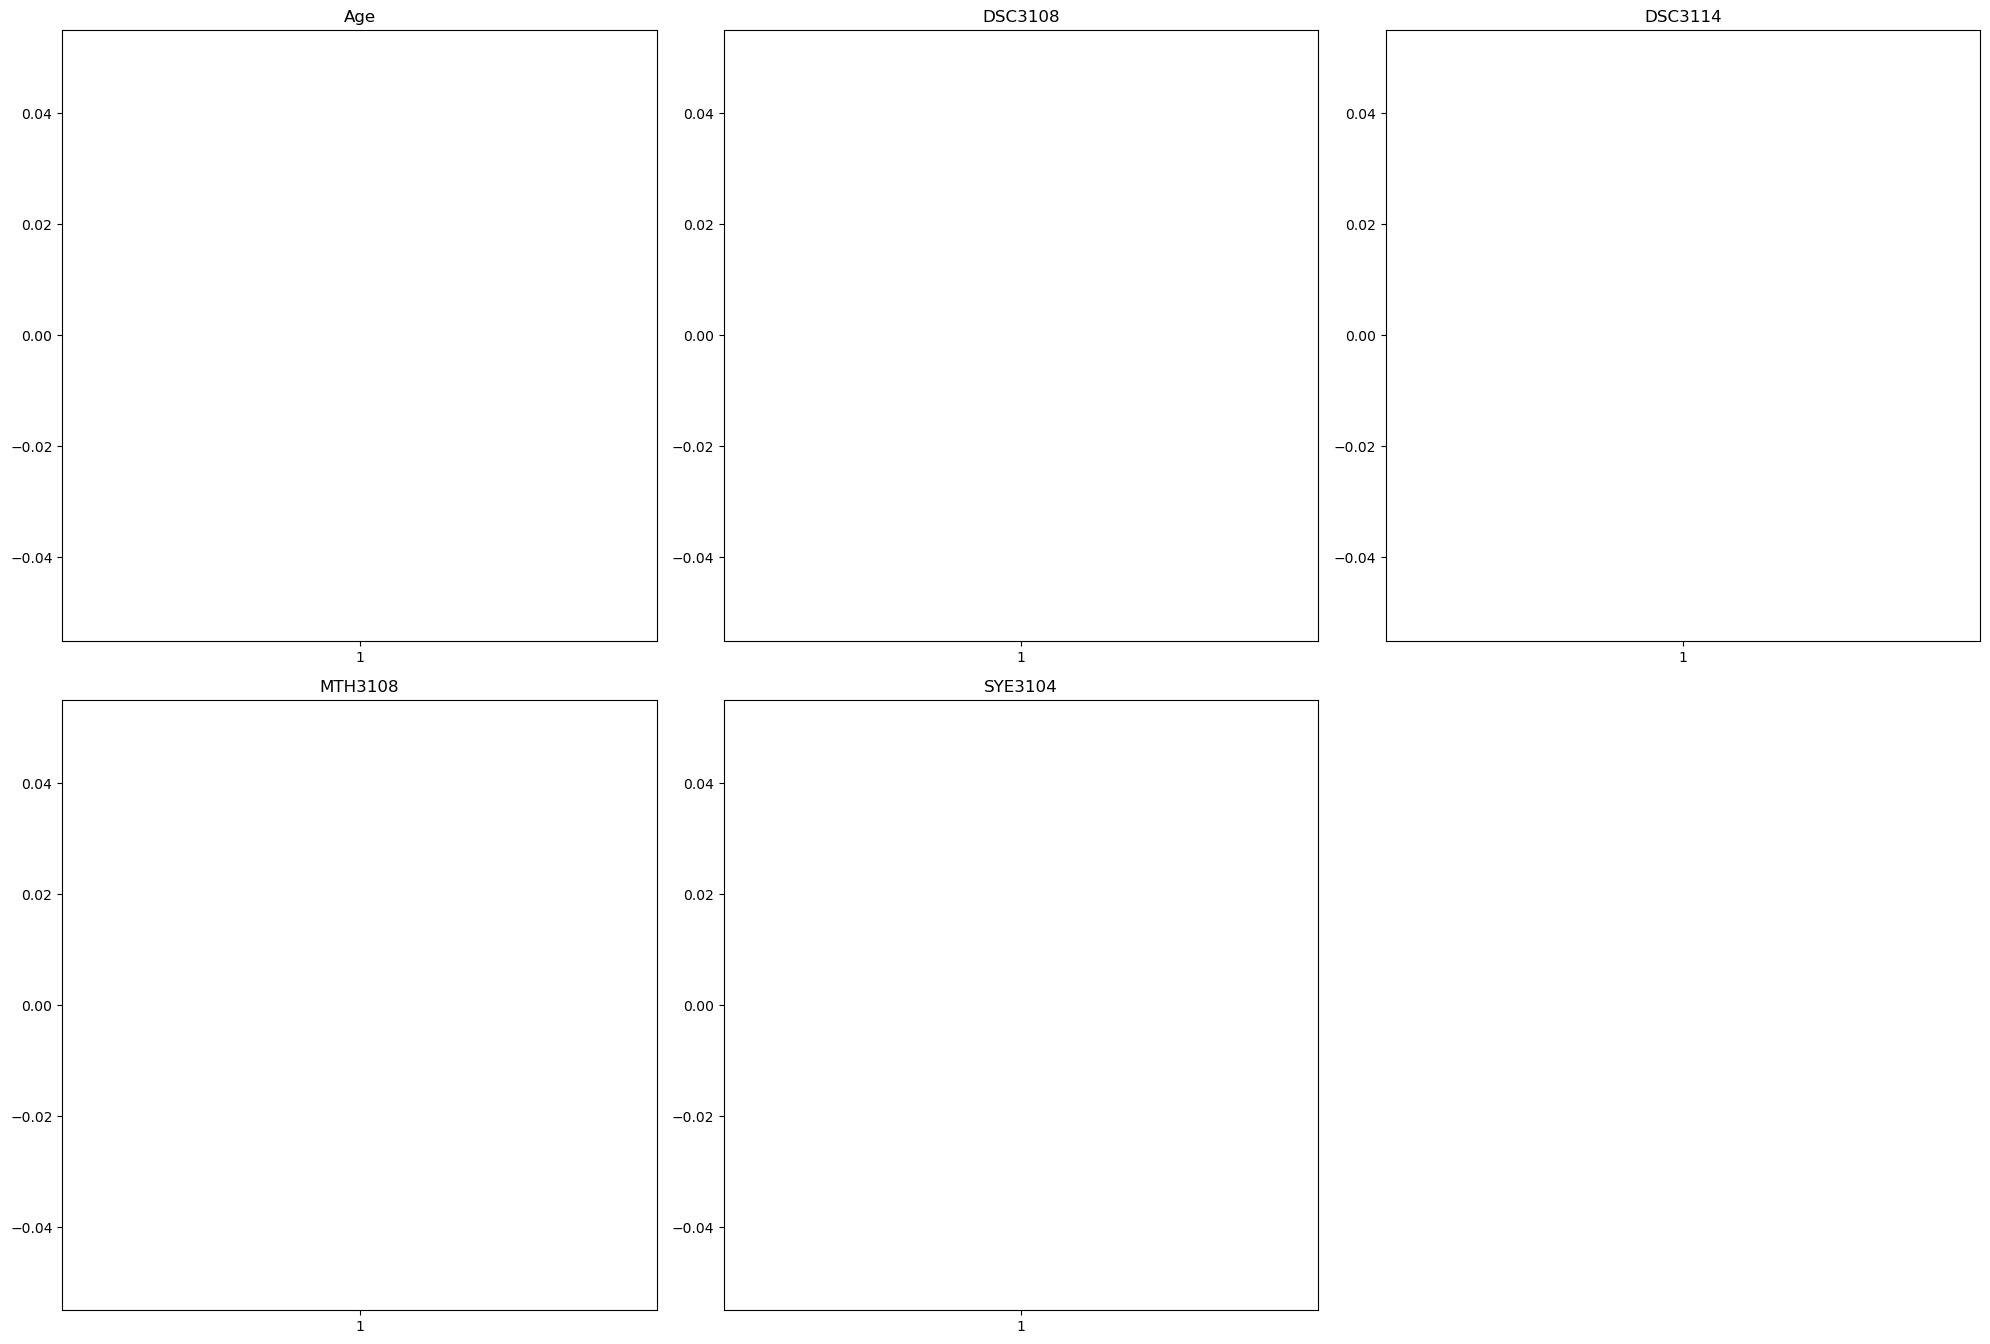

In [19]:
box_plotting(continuous)


In [ ]:

def outlier_remove(columns):
    for i in columns:
        
        lower_quantile = student_data[i].quantile(.25)
        upper_quantile = student_data[i].quantile(.75)
        
        
        IQR  = upper_quantile-lower_quantile
        
        upper_boundary = upper_quantile + 1.5 * IQR
        lower_boundary = lower_quantile - 1.5*IQR
        
        student_data[i] = np.where(student_data[i]>upper_boundary, upper_boundary, student_data[i])
        student_data[i] = np.where(student_data[i]<lower_boundary, lower_boundary, student_data[i])

In [ ]:
outlier_remove(continuous.columns)


In [ ]:
box_plotting(continuous)
